## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [93]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [95]:
DF_raw = pd.read_csv('mapdataall.csv')
show(DF_raw)

**Q1** How many variables and observations?

**Q2** How many different incident types are there?

**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

In [97]:
# You will need to write some code to answer the questions.
DF_raw.shape

(2727, 23)

In [98]:
# 1. 23 variables, 2727 observations

In [99]:
DF_raw.keys()

Index(['incident_name', 'incident_is_final', 'incident_date_last_update',
       'incident_date_created', 'incident_administrative_unit',
       'incident_administrative_unit_url', 'incident_county',
       'incident_location', 'incident_acres_burned', 'incident_containment',
       'incident_control', 'incident_cooperating_agencies',
       'incident_longitude', 'incident_latitude', 'incident_type',
       'incident_id', 'incident_url', 'incident_date_extinguished',
       'incident_dateonly_extinguished', 'incident_dateonly_created',
       'is_active', 'calfire_incident', 'notification_desired'],
      dtype='object')

In [100]:
my_columns=['incident_type']
DF_incidenttypes = DF_raw[my_columns]
incident_type_list = list(DF_incidenttypes['incident_type'].unique())
incident_type_list

# 4 different types of incidents, 3 if excluding NaN

[nan, 'Wildfire', 'Flood', 'Fire']

In [101]:
my_columns = ['incident_acres_burned','calfire_incident']
DF_acresburned = DF_raw[my_columns]
DF_acresburned['incident_acres_burned'].describe()

count    2.675000e+03
mean     4.399830e+03
std      3.585484e+04
min      0.000000e+00
25%      3.200000e+01
50%      8.600000e+01
75%      3.530000e+02
max      1.032648e+06
Name: incident_acres_burned, dtype: float64

In [102]:
my_columns = ['incident_acres_burned','calfire_incident']
DF_acresburned = DF_raw[my_columns]
DF_acresburned.groupby(by=['calfire_incident'])[my_columns].describe()



incident_acres_burned                                         \
                                 count         mean           std  min    25%   
calfire_incident                                                                
False                            770.0  8237.038961  56393.223332  0.0  44.25   
True                            1905.0  2848.832546  22642.207117  0.0  29.00   

                                             
                    50%      75%        max  
calfire_incident                             
False             156.0  1078.75  1032648.0  
True               73.0   237.00   429603.0

In [122]:
DF_acresburned.max()
mask_fires = (DF_acresburned['incident_acres_burned']>1000.0) & (DF_acresburned['incident_acres_burned']<500000.0)
DF_acresburned_mask = DF_acresburned[mask_fires]
DF_acresburned_mask


,incident_acres_burned,calfire_incident
5,6896.0,True
8,2956.0,True
13,4346.0,True
22,2650.0,True
25,2500.0,True
...,...,...
2682,17000.0,True
2688,44309.0,True
2698,54878.0,False
2699,1960.0,False


In [126]:
DF_acresburned_mask.max()

incident_acres_burned    429603.0
calfire_incident             True
dtype: object

In [138]:
mask_fires_2 = (DF_acresburned['incident_acres_burned']>100000.0)
DF_acresburned_mask2 = DF_acresburned[mask_fires_2]
fires_list = list(DF_acresburned_mask2['incident_acres_burned'].unique())
print(len(fires_list))


20


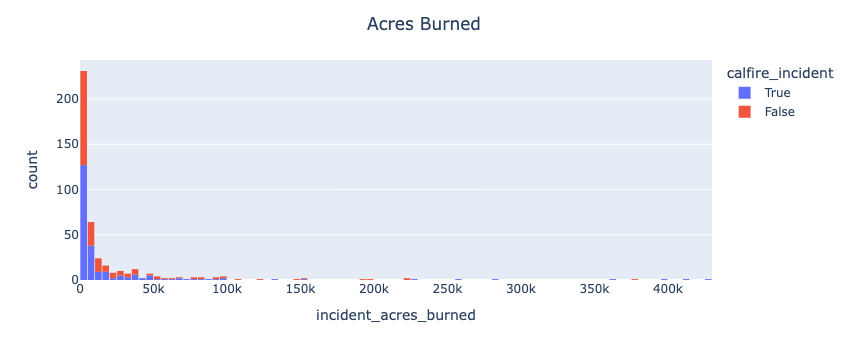

In [124]:
fig = px.histogram(DF_acresburned_mask,
                   nbins=100,
                   x='incident_acres_burned',
                   color = 'calfire_incident')


fig.update_layout(bargap=0.1,
                  title='Acres Burned',
                  title_x=0.5)
fig.show()

In [ ]:
# The largest fire in the raw data set burned 1032648.0 acres.
# The largest fire in the histogram above burned 429603.0 acres.
# 20 fires burned more than 100,000 acres

## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [4]:
# Your code here


In [10]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1950,19
4,1948,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1929,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [11]:
# Your code here


**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [12]:
# Your code here


## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.